In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import time 
import datetime
import collections
# from plotnine import *
import seaborn as sns
import scipy.stats as stats

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

This file is 35 column with no missing data 


123.csv : no missing value 

In [3]:
zillow = pd.read_csv('/content/drive/MyDrive/SWE project/DataStorage/123.csv')

In [4]:
zillow.shape

(88465, 35)

In [5]:
zillow.isnull().sum()

logerror                        0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
finishedfloor1squarefeet        0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
finishedsquarefeet50            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidneighborhood            0
regionidzip                     0
roomcnt                         0
threequarterbathnbr             0
unitcnt                         0
yearbuilt                       0
numberofstorie

Then we need to see each feature with target variable


In [6]:
zillow.head()

,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet50,...,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock
0,0.0276,1.000000,2.0,3,4.0,2.0,1213.533333,1684.0,1684.0,1213.533333,...,0,1.0,1.000000,1959.0,1.266667,122754.0,360170.0,237416.0,6735.88,6.037110e+13
1,-0.1684,6.333333,3.5,4,5.6,3.5,1433.600000,2263.0,2263.0,1433.600000,...,0,1.0,1.066667,2014.0,1.533333,346458.0,585529.0,239071.0,10153.02,6.054730e+13
2,-0.0040,1.000000,3.0,2,4.0,3.0,1332.400000,2217.0,2217.0,1332.400000,...,0,1.0,1.000000,1940.0,1.266667,61994.0,119906.0,57912.0,11484.48,6.037460e+13
3,0.0218,1.000000,2.0,2,4.0,2.0,1360.866667,839.0,839.0,1360.866667,...,0,1.0,1.000000,1987.0,1.333333,171518.0,244880.0,73362.0,3048.74,6.037300e+13
4,-0.0050,8.466667,2.5,4,5.0,2.5,1188.533333,2283.0,2283.0,1188.533333,...,8,1.0,2.066667,1981.0,2.000000,169574.0,434551.0,264977.0,5488.96,6.059040e+13


In [7]:
zillow.dtypes

logerror                        float64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                        int64
buildingqualitytypeid           float64
calculatedbathnbr               float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet50            float64
fips                              int64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                          int64
longitude                         int64
lotsizesquarefeet               float64
propertylandusetypeid             int64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                    int64
regionidneighborhood            float64
regionidzip                     float64


Transform Transform incorrectly scaled variables

 Box-Cox Transformation

Checking Outliers & Removing them

In [8]:
X_temp = zillow.copy()

In [10]:
from scipy.stats import skew

In [11]:
# Code to detect any skewed features 
skewed_feats = X_temp.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats[:20]

regionidzip                     84.125633
unitcnt                         63.984492
threequarterbathnbr             36.675680
lotsizesquarefeet               28.059135
landtaxvaluedollarcnt           11.466372
taxamount                        9.417346
taxvaluedollarcnt                9.358906
structuretaxvaluedollarcnt       8.263550
regionidcity                     6.488632
fireplacecnt                     5.296977
finishedsquarefeet50             4.471650
finishedfloor1squarefeet         3.896920
finishedsquarefeet12             2.749295
calculatedfinishedsquarefeet     2.689515
numberofstories                  2.139980
censustractandblock              2.085800
rawcensustractandblock           2.084279
fips                             2.066288
garagecarcnt                     1.918685
airconditioningtypeid            1.582601
dtype: float64

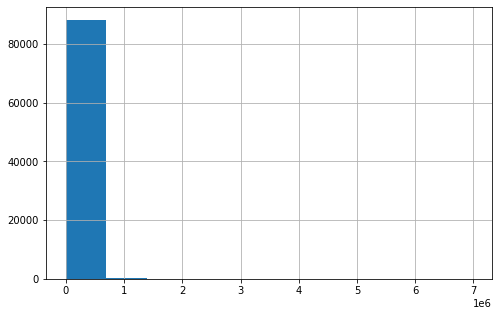

In [13]:
X_temp.lotsizesquarefeet.hist(bins=10, figsize=(8,5))
plt.show()

In [16]:
from datetime import date
from scipy.special import boxcox1p

class BoxCoxSkewedFeatures():
    """
    Performs Box-Cox tranformation on all numerical variables with skewness
    above a certain threshold. 
    """
    def __init__(self, skewness_thres=0.75):
        self.skewness_thres = skewness_thres
    def fit(self, X, y=None):
        return self  # nothing else to do 
    def transform(self, X): 
        numeric_feats = X.dtypes[X.dtypes == 'float'].index
        skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
        
        skewed_feats = skewed_feats[abs(skewed_feats) > self.skewness_thres].index
        
        # Apply box-cox to each variable 
        lam = 0.18
        for feat in skewed_feats:
            X[feat] = X[feat] + abs(min(X[feat]))       # Translate feature to ensure minimum value is 0 
            X[feat] = boxcox1p(X[feat], lam)
        return X
    

# # Code to test pipeline
skew_transformer = BoxCoxSkewedFeatures()
X_temp = skew_transformer.transform(X_temp)

Checking again

In [18]:
# Check skewed features after box-cox transformation

skewed_feats = X_temp.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats[:20]

regionidzip                     81.927199
threequarterbathnbr             33.885679
fireplacecnt                     4.205322
lotsizesquarefeet                2.604831
censustractandblock              2.083114
rawcensustractandblock           2.081591
fips                             2.066288
unitcnt                          1.840751
numberofstories                  1.780748
regionidcity                     1.547458
roomcnt                          1.531769
airconditioningtypeid            1.336682
bedroomcnt                       0.727296
heatingorsystemtypeid            0.717668
logerror                         0.715660
finishedsquarefeet12             0.712048
calculatedfinishedsquarefeet     0.663513
taxamount                        0.647560
fullbathcnt                      0.572406
structuretaxvaluedollarcnt       0.549911
dtype: float64

In [19]:
X_temp.shape

(88465, 35)

Delted two very skness feature after Box-cox operation

In [41]:
X_temp.drop(['regionidzip','threequarterbathnbr'],axis = 1,inplace = True)

In [46]:
X_temp.shape

(88465, 33)

In [51]:
X_temp.shape

(88465, 33)

In [52]:
new = X_temp.copy()

Dealting with outile for each feature

In [55]:
from scipy import stats
newData = new[(np.abs(stats.zscore(new)) < 3).all(axis=1)]

In [57]:
newData.isnull().sum()

logerror                        0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
finishedfloor1squarefeet        0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
finishedsquarefeet50            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidneighborhood            0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
numberofstories                 0
structuretaxvaluedollarcnt      0
taxvaluedollar

In [58]:
newData.shape

(69047, 33)

Dealting with outile for each feature

Store current stage data

In [60]:
#we need to save data here
from google.colab import files
newData.to_csv('dataBeforeFeatureEngineering.csv') 
files.download('dataBeforeFeatureEngineering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
newData.shape

(69047, 33)